In [ ]:
import os
import sys
from matplotlib import pyplot as plt
import numpy as np
from pde_superresolution_2d.core import equations
from pde_superresolution_2d.core import grids
import pde_superresolution_2d as pde
import tensorflow as tf
tf.enable_eager_execution()
import xarray as xr

# First example: Advection diffusion

In this example we'll see how, with a pre-defined equation we can integrate it in time. Here we deal with the Advection-Diffusion equation, defined in `advection/equations`. 

In [ ]:
equation = pde.advection.equations.FiniteVolumeAdvectionDiffusion(
    diffusion_coefficient=0.01, 
    cfl_safety_factor=0.9)
grid = grids.Grid.from_period(size=256, length=2*np.pi)

Note that we also chose a grid. To integrate in time we need an initial state. Equations instances have a `random_state` that generates a state. The distribution of these initial conditions, when sampled from different seeds, will define the training set for later. Let's sample one random initial state:

dict_keys(['concentration', 'x_velocity', 'y_velocity'])


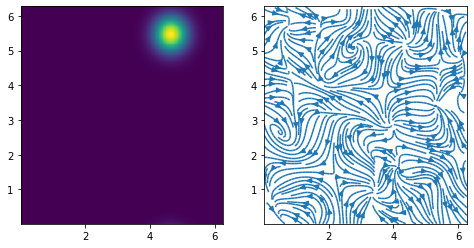

In [7]:
initial_state = equation.random_state(grid, seed=7109179)
print(initial_state.keys())
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].pcolor(grid.get_mesh()[1],
              grid.get_mesh()[0],
              initial_state['concentration'])
axs[1].streamplot(grid.get_mesh()[1],
                  grid.get_mesh()[0],
                  initial_state['x_velocity'],initial_state['y_velocity'],
                  density=2);

The state of an equation contains all relevant fields needed for integrating in time. For advection diffusion these are `concentration`, `x_velocity`, and  `y_velocity`. To integrate in time, we let the equation suggest the time-step, and use ...

In [4]:
time_step = equation.get_time_step(grid)
times = time_step*np.arange(400)

integrated_once = pde.core.integrate.integrate_times(
    model=pde.core.models.FiniteDifferenceModel(equation,grid),
    state=initial_state,
    times=times, axis=0)

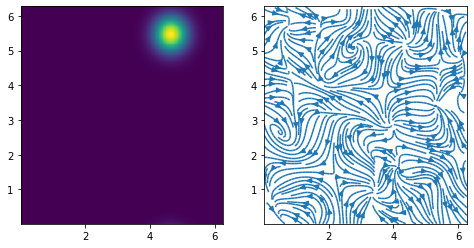

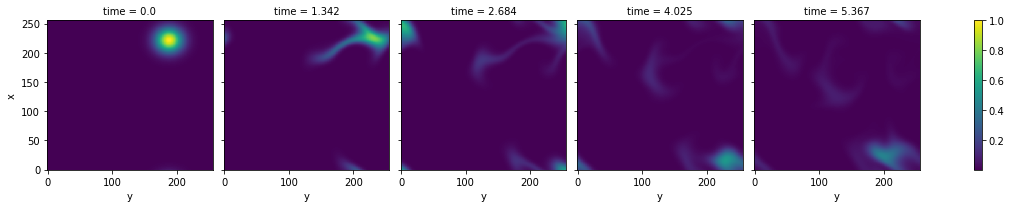

In [5]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].pcolor(grid.get_mesh()[1],
              grid.get_mesh()[0],
              initial_state['concentration'])
axs[1].streamplot(grid.get_mesh()[1],
                  grid.get_mesh()[0],
                  initial_state['x_velocity'],initial_state['y_velocity'],
                  density=2)

conc=xr.DataArray(integrated_once['concentration'].numpy(),
                  dims=['time', 'x','y'],
                  coords={'time':times}
                 )
conc[::99].plot(col='time')

In [10]:
io.numpy().shape

(50, 128, 128)